# Check for the best REGRESSION MODEL amongst XGB,LGBM,Random Forest, Lasso,Elastic-Net and Linear Regression to predict house pricing 

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts
from hyperopt import hp

import seaborn as sns
sns.set(color_codes=True)
sns.set_palette("deep")

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_absolute_error as MAE , mean_squared_log_error as rmsle, r2_score as r2
from sklearn import metrics 


## Reading the dataset and creating the dataframe

In [2]:
read=pd.read_csv(r'C:\Users\Hp\Desktop\DATA SCIENCE DOCS\.csv Files\House_Price_Prediction.csv',low_memory=False,parse_dates=['date'])
df=pd.DataFrame(read)
df1=df.copy()
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## Parse the 'date' column

In [3]:
df1['saleYear']=df1['date'].dt.year
df1['saleMonth']=df1['date'].dt.month
df1['saleDay']=df1['date'].dt.day
df1['saleDayofWeek']=df1['date'].dt.dayofweek
df1['saleDayOfYear']=df1['date'].dt.dayofyear
df1.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,street,city,statezip,country,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayOfYear
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5,2,4,122
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,0,709 W Blaine St,Seattle,WA 98119,USA,2014,5,2,4,122
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5,2,4,122
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5,2,4,122
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5,2,4,122
5,2014-05-02,490000.0,2.0,1.00,880,6380,1.0,0,0,3,...,1994,522 NE 88th St,Seattle,WA 98115,USA,2014,5,2,4,122
6,2014-05-02,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,...,0,2616 174th Ave NE,Redmond,WA 98052,USA,2014,5,2,4,122
7,2014-05-02,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,...,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA,2014,5,2,4,122
8,2014-05-02,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,...,0,46611-46625 SE 129th St,North Bend,WA 98045,USA,2014,5,2,4,122
9,2014-05-02,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,...,2010,6811 55th Ave NE,Seattle,WA 98115,USA,2014,5,2,4,122


## Drop the 'date' column

In [4]:
df1.drop('date',axis=1,inplace=True)
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,yr_renovated,street,city,statezip,country,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayOfYear
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5,2,4,122
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,709 W Blaine St,Seattle,WA 98119,USA,2014,5,2,4,122
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5,2,4,122
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5,2,4,122
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5,2,4,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,1979,501 N 143rd St,Seattle,WA 98133,USA,2014,7,9,2,190
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,2014,7,9,2,190
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,2014,7,9,2,190
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,0,5148 S Creston St,Seattle,WA 98178,USA,2014,7,10,3,191


## The column 'country' and 'saleYear' seem to be not important so we can drop it

In [5]:
df1['country'].value_counts()

USA    4600
Name: country, dtype: int64

In [6]:
df1.drop('country',axis=1,inplace=True)
df1.drop('saleYear',axis=1,inplace=True)
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,saleMonth,saleDay,saleDayofWeek,saleDayOfYear
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,5,2,4,122
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,5,2,4,122
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,5,2,4,122
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,5,2,4,122
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,5,2,4,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,7,9,2,190
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,7,9,2,190
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,7,9,2,190
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,7,10,3,191


## Check percentage of missing values

In [7]:
100*(df1.isnull().sum())/len(df1)

price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
street           0.0
city             0.0
statezip         0.0
saleMonth        0.0
saleDay          0.0
saleDayofWeek    0.0
saleDayOfYear    0.0
dtype: float64

## Check and Convert categorical/object type features into numerical

In [8]:
for i in df1.columns:
    if not pd.api.types.is_numeric_dtype(df1[i].values):
        print(i)

street
city
statezip


In [9]:
for i in df1.columns:
    if not pd.api.types.is_numeric_dtype(df1[i].values):
        df1[i]=pd.Categorical(df1[i].values).codes


## Check for duplicate features. EXCLUDE THE TARGET VARIABLE

In [10]:
%%time

df_dup=df1.copy()
df_dup.drop('price',axis=1,inplace=True)

#Print how many duplicate features are there
print(df_dup.T.duplicated().sum())

#Show the duplicated features
unique_features = df_dup.T.drop_duplicates(keep='first').T
unique_features
duplicated_features = [dup_col for dup_col in df_dup.columns if dup_col not in unique_features.columns]
duplicated_features

0
Wall time: 3.6 s


[]

## Check if price is 0 and if houses have 0 bedrooms

In [11]:
df1['price'].value_counts()

0.0         49
300000.0    42
400000.0    31
450000.0    29
600000.0    29
            ..
586500.0     1
693000.0     1
226500.0     1
257200.0     1
256000.0     1
Name: price, Length: 1741, dtype: int64

In [12]:
df1['bedrooms'].value_counts()

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
0.0       2
8.0       2
9.0       1
Name: bedrooms, dtype: int64

In [13]:
df1=df1[(df1['price']>0) & (df1['bedrooms']>0)]
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,saleMonth,saleDay,saleDayofWeek,saleDayOfYear
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62,5,2,4,122
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58,5,2,4,122
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26,5,2,4,122
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7,5,2,4,122
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31,5,2,4,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3447,35,62,7,9,2,190
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,960,3,6,7,9,2,190
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4033,32,37,7,9,2,190
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,3498,35,71,7,10,3,191


## Correlation Heat-Map

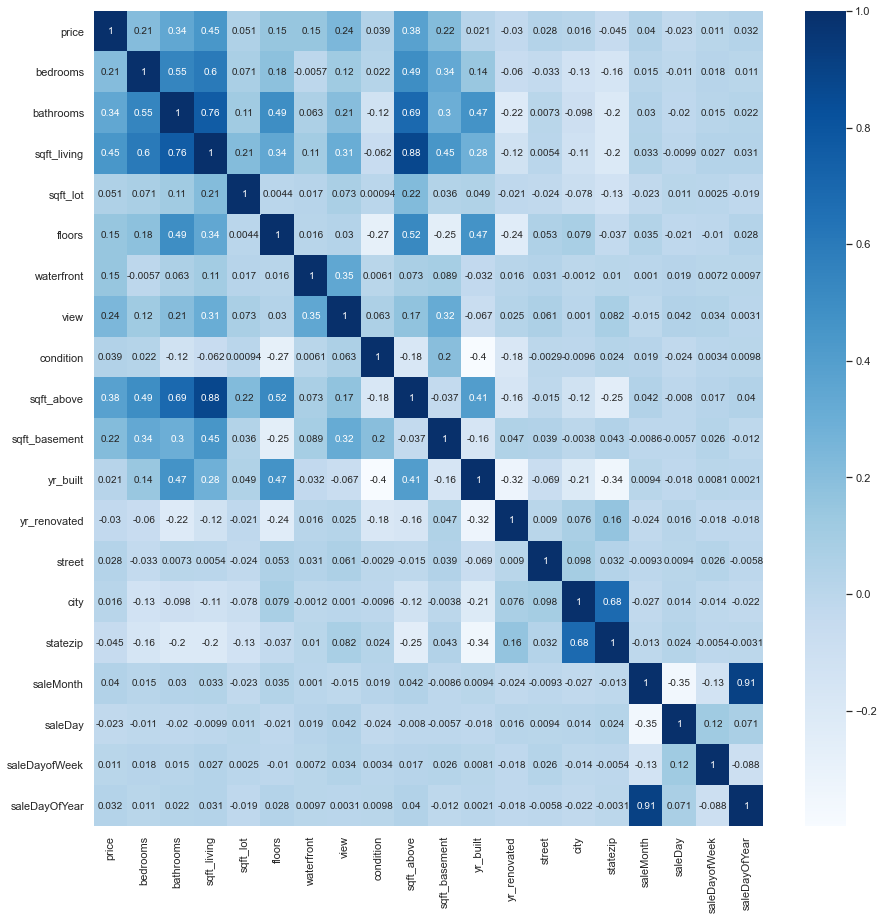

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True,cmap='Blues');
plt.show()

## Checking the correlation of features and excluding the ones which are highly correlated with one another

Note:

1) np.triu(m,k=0) ->returns the upper triangle of any array

2) k=0 ->upper triangle including the diagonal with values 1, k=1 ->upper triangle exluding the diagonal with values 1

3) np.ones((m,n)) -> matrix of ones with m rows and n columns

In [15]:
corr_matrix=abs(df1.corr())

#Upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,saleMonth,saleDay,saleDayofWeek,saleDayOfYear
price,NaN,0.212814,0.343186,0.445042,0.051317,0.152010,0.150167,0.242407,0.039238,0.380060,0.218200,0.021444,0.029661,0.028217,0.015849,0.044781,0.040339,0.023157,0.010834,0.032440
bedrooms,NaN,NaN,0.545645,0.601614,0.071432,0.180860,0.005673,0.117163,0.021990,0.492056,0.335067,0.143019,0.060404,0.033006,0.129618,0.157326,0.014869,0.011162,0.018350,0.010927
bathrooms,NaN,NaN,NaN,0.761544,0.109572,0.493975,0.063318,0.207231,0.121796,0.692494,0.295543,0.465860,0.217103,0.007285,0.097610,0.196946,0.029557,0.020430,0.015455,0.022413
sqft_living,NaN,NaN,NaN,NaN,0.213313,0.343041,0.107930,0.309521,0.062042,0.875418,0.450709,0.284498,0.122766,0.005399,0.109311,0.199446,0.032976,0.009876,0.027479,0.030530
sqft_lot,NaN,NaN,NaN,NaN,NaN,0.004407,0.017410,0.072738,0.000942,0.219352,0.035912,0.049157,0.021098,0.023780,0.078218,0.127442,0.022630,0.010904,0.002480,0.019357
floors,NaN,NaN,NaN,NaN,NaN,NaN,0.015912,0.030236,0.273574,0.521990,0.254794,0.466823,0.237664,0.053464,0.078921,0.037207,0.035437,0.020999,0.010057,0.028322
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.347815,0.006088,0.072706,0.088865,0.031997,0.015870,0.030781,0.001161,0.010291,0.001009,0.019085,0.007174,0.009672
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062897,0.174506,0.317633,0.066674,0.025330,0.061500,0.001024,0.081901,0.014794,0.042479,0.034256,0.003077
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.176119,0.196986,0.398773,0.184203,0.002910,0.009640,0.024348,0.019273,0.024301,0.003405,0.009850
sqft_above,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.036928,0.406412,0.162926,0.015059,0.120300,0.246601,0.041565,0.007986,0.016887,0.040474


In [16]:
#droping features/columns with condition
drop_features=[col for col in upper.columns if any(upper[col]>0.6)]

df_corr=df1.copy()
df_corr.drop(drop_features,axis=1,inplace=True)
df1=df_corr.copy()
df1

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,street,city,saleMonth,saleDay,saleDayofWeek
0,3.130000e+05,3.0,1.50,7912,1.5,0,0,3,0,1955,2005,1522,36,5,2,4
1,2.384000e+06,5.0,2.50,9050,2.0,0,4,5,280,1921,0,3899,35,5,2,4
2,3.420000e+05,3.0,2.00,11947,1.0,0,0,4,0,1966,0,2291,18,5,2,4
3,4.200000e+05,3.0,2.25,8030,1.0,0,0,4,1000,1963,0,4263,3,5,2,4
4,5.500000e+05,4.0,2.50,10500,1.0,0,0,4,800,1976,1992,4352,31,5,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,6360,1.0,0,0,4,0,1954,1979,3447,35,7,9,2
4596,5.343333e+05,3.0,2.50,7573,2.0,0,0,3,0,1983,2009,960,3,7,9,2
4597,4.169042e+05,3.0,2.50,7014,2.0,0,0,3,0,2009,0,4033,32,7,9,2
4598,2.034000e+05,4.0,2.00,6630,1.0,0,0,3,1020,1974,0,3498,35,7,10,3


## Feature Selection

### a) Checking the correlation of features with Target variable('price')

In [17]:
corr=df1.corr()['price'].sort_values(ascending=False)
corr

price            1.000000
bathrooms        0.343186
view             0.242407
sqft_basement    0.218200
bedrooms         0.212814
floors           0.152010
waterfront       0.150167
sqft_lot         0.051317
saleMonth        0.040339
condition        0.039238
street           0.028217
yr_built         0.021444
city             0.015849
saleDayofWeek    0.010834
saleDay         -0.023157
yr_renovated    -0.029661
Name: price, dtype: float64

#### Selecting columns based on correlation coefficients

In [18]:
abs_corr=abs(corr)
list_corr=[] #list to store the relevant features
relevant_features=abs_corr[abs_corr>0.1]
relevant_features=relevant_features[relevant_features<1]
list_corr=list(relevant_features.index)
list_corr

['bathrooms', 'view', 'sqft_basement', 'bedrooms', 'floors', 'waterfront']

### b) Selecting the K best features using SelectKBest

In [19]:
%%time

from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.feature_selection import SelectKBest

df_select=df1.drop('price',axis=1)
list_select=[]
select_k=10

selection=SelectKBest(mutual_info_regression,k=select_k).fit(df_select,df1['price'])

Wall time: 4.13 s


In [20]:
features=df_select.columns[selection.get_support(indices=True)]
list_select=list(features)
list_select

['bedrooms',
 'bathrooms',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'sqft_basement',
 'yr_built',
 'street',
 'city']

## Splitting of data using Train-Test-Split and Standardization/Normalization

##### Splitting dataset 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as sc, MinMaxScaler as mms
from sklearn.model_selection import KFold


#Splitting the original dataset
x_train,x_test,y_train,y_test=train_test_split(df1.drop('price',axis=1),df1['price'],test_size=0.1,random_state=200)


"""kf = KFold(n_splits=5)

df_split_X=df1.drop('price',axis=1).copy()
df_split_y=df1['price'].copy()
cnt=1

for train_index, test_index in kf.split(df1.drop('price',axis=1),df1['price']):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1"""

"kf = KFold(n_splits=5)\n\ndf_split_X=df1.drop('price',axis=1).copy()\ndf_split_y=df1['price'].copy()\ncnt=1\n\nfor train_index, test_index in kf.split(df1.drop('price',axis=1),df1['price']):\n    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')\n    cnt += 1"

#### Standardizing x_train and x_test according to Feature Selection Methods:


##### Method a:

In [22]:
x_train_corr=x_train[list_corr]
x_test_corr=x_test[list_corr]

x_train_corr=mms().fit_transform(x_train_corr)
x_test_corr=mms().fit_transform(x_test_corr)

##### Method b:

In [23]:
x_train_select=x_train[list_select]
x_test_select=x_test[list_select]

x_train_select=mms().fit_transform(x_train_select)
x_test_select=mms().fit_transform(x_test_select)



## Customized Score function

In [24]:
def show_scores(model,x_train,x_test):
    train_pred=model.predict(x_train)
    val_pred=model.predict(x_test)
    scores={"Training MAE: ":MAE(y_train,train_pred),
            "Test MAE: ":MAE(y_test,val_pred),
            """"Training RMSLE: ":rmsle(y_train,train_pred),
            "Test RMSLE: ":rmsle(y_test,val_pred),"""
            "Training R2: ":r2(y_train,train_pred),
            "Test R2: ":r2(y_test,val_pred)}
    return scores


## MODELLING Test sample USING RandomizedSearchCV for  'Random Forest', 'XGB' AND 'LGBM'


### a)  XGB

#### 1) Correlation

In [25]:
"""%%time 

xgb_params={'max_depth': np.arange( 3, 18, 1),
        'gamma': np.arange(1,9,1),
        'reg_alpha' : np.arange (40,180,10),
        'reg_lambda' : np.arange(0,1,0.1),
        'colsample_bytree' : np.arange(0.5,1,0.1),
        'min_child_weight' : np.arange(0, 10, 1),
        'seed': [0]}


rs_model=RandomizedSearchCV(xgb.XGBRegressor(learning_rate=0.01 , objective='reg:squarederror',n_estimators=1000),
                            param_distributions=xgb_params,n_iter=100,
                            cv=5,verbose=True)


rs_model.fit(x_train_corr,y_train)

rs_model.best_params_"""

"%%time \n\nxgb_params={'max_depth': np.arange( 3, 18, 1),\n        'gamma': np.arange(1,9,1),\n        'reg_alpha' : np.arange (40,180,10),\n        'reg_lambda' : np.arange(0,1,0.1),\n        'colsample_bytree' : np.arange(0.5,1,0.1),\n        'min_child_weight' : np.arange(0, 10, 1),\n        'seed': [0]}\n\n\nrs_model=RandomizedSearchCV(xgb.XGBRegressor(learning_rate=0.01 , objective='reg:squarederror',n_estimators=1000),\n                            param_distributions=xgb_params,n_iter=100,\n                            cv=5,verbose=True)\n\n\nrs_model.fit(x_train_corr,y_train)\n\nrs_model.best_params_"

In [26]:
xgb_params={'max_depth': 7,  
        'gamma': 3,
        'reg_alpha' : 70,
        'reg_lambda' : 0.1,
        'colsample_bytree' : 0.9,
        'min_child_weight' : 1,
        'seed': 0,
        'learning_rate':0.01 , 
        'objective':'reg:squarederror',
        'n_estimators':1000}

xgb_model=xgb.XGBRegressor(**xgb_params) # Directly pass the dictionary to avoid any errors like 'unknown objective function'

xgb_model.fit(x_train_corr,y_train) #,early_stopping_rounds=10,eval_set=[(x_train_corr, y_train)]
print("Training score:",xgb_model.score(x_train_corr,y_train),'  ',end='')

xgb_model.fit(x_test_corr,y_test)
print("Testing score:",xgb_model.score(x_test_corr,y_test))

Training score: 0.7682963440668288   Testing score: 0.12613502256307563


#### 2) SelectKbest

In [27]:
"""%%time 

xgb_params={'max_depth': np.arange( 3, 18, 1),
        'gamma': np.arange(1,9,1),
        'reg_alpha' : np.arange (40,180,10),
        'reg_lambda' : np.arange(0,1,0.1),
        'colsample_bytree' : np.arange(0.5,1,0.1),
        'min_child_weight' : np.arange(0, 10, 1),
        'seed': [0]}


rs_model=RandomizedSearchCV(xgb.XGBRegressor(learning_rate=0.01 , objective='reg:squarederror',n_estimators=1000),
                            param_distributions=xgb_params,n_iter=100,
                            cv=5,verbose=True)


rs_model.fit(x_train_select,y_train)

rs_model.best_params_"""

"%%time \n\nxgb_params={'max_depth': np.arange( 3, 18, 1),\n        'gamma': np.arange(1,9,1),\n        'reg_alpha' : np.arange (40,180,10),\n        'reg_lambda' : np.arange(0,1,0.1),\n        'colsample_bytree' : np.arange(0.5,1,0.1),\n        'min_child_weight' : np.arange(0, 10, 1),\n        'seed': [0]}\n\n\nrs_model=RandomizedSearchCV(xgb.XGBRegressor(learning_rate=0.01 , objective='reg:squarederror',n_estimators=1000),\n                            param_distributions=xgb_params,n_iter=100,\n                            cv=5,verbose=True)\n\n\nrs_model.fit(x_train_select,y_train)\n\nrs_model.best_params_"

In [28]:
xgb_params={'max_depth':7,
        'gamma': 8,
        'reg_alpha' : 130,
        'reg_lambda' :0.1,
        'colsample_bytree' : 0.9,  
        'min_child_weight' : 6, 
        'seed': 0,
        'learning_rate':0.01,
        'objective':'reg:squarederror',
        'n_estimators':1000}

xgb_model=xgb.XGBRegressor(**xgb_params) # Directly pass the dictionary to avoid any errors like 'unknown objective function'

xgb_model.fit(x_train_select,y_train) #,early_stopping_rounds=10,eval_set=[(x_train_corr, y_train)]
print("Training score:",xgb_model.score(x_train_select,y_train),'  ',end='')

xgb_model.fit(x_test_select,y_test)
print("Testing score:",xgb_model.score(x_test_select,y_test))

Training score: 0.8178839151566205   Testing score: 0.8159135021608885


### LGBM

##### 1) correlation

In [29]:
"""%%time

lgbm_params= {
    'num_leaves':[4,8,16,32],
    'max_depth': [3,5,7],
    'boosting_type': ['gbdt'],
    'random_state': [42],
    "min_data_in_leaf": [5,10,15,20],
    'colsample_bytree' : [0.25,0.5,0.6,0.7,0.8],
    'colsample_bytree' : [0.6,0.7,0.8,0.9],
    'subsample': [1, 0.9, 0.8,0.5],
    'max_bin':[50,100,200],
    'is_unbalance': [True, False],
    'min_child_weight':[5,10,25,50],
    'n_jobs': [-1]
}



rs_model=RandomizedSearchCV(lgb.LGBMRegressor(learning_rate=0.01 , objective='regression',n_estimators=1000),
                            param_distributions=lgbm_params,n_iter=100,
                            cv=5,verbose=True)


rs_model.fit(x_train_corr,y_train)

rs_model.best_params_"""

'%%time\n\nlgbm_params= {\n    \'num_leaves\':[4,8,16,32],\n    \'max_depth\': [3,5,7],\n    \'boosting_type\': [\'gbdt\'],\n    \'random_state\': [42],\n    "min_data_in_leaf": [5,10,15,20],\n    \'colsample_bytree\' : [0.25,0.5,0.6,0.7,0.8],\n    \'colsample_bytree\' : [0.6,0.7,0.8,0.9],\n    \'subsample\': [1, 0.9, 0.8,0.5],\n    \'max_bin\':[50,100,200],\n    \'is_unbalance\': [True, False],\n    \'min_child_weight\':[5,10,25,50],\n    \'n_jobs\': [-1]\n}\n\n\n\nrs_model=RandomizedSearchCV(lgb.LGBMRegressor(learning_rate=0.01 , objective=\'regression\',n_estimators=1000),\n                            param_distributions=lgbm_params,n_iter=100,\n                            cv=5,verbose=True)\n\n\nrs_model.fit(x_train_corr,y_train)\n\nrs_model.best_params_'

In [30]:
lgbm_params={'subsample': 0.9,
 'random_state': 200,
 'num_leaves': 8,
 'n_jobs': -1,
 'min_data_in_leaf': 15,
 'min_child_weight': 5,
 'max_depth': 3,
 'max_bin': 200,
 'is_unbalance': False,
 'colsample_bytree': 0.6,
 'boosting_type': 'gbdt'}

lgbm_model=lgb.LGBMRegressor(**lgbm_params) # Directly pass the dictionary to avoid any errors like 'unknown objective function'

lgbm_model.fit(x_train_corr,y_train) #,early_stopping_rounds=10,eval_set=[(x_train_corr, y_train)]
print("TRAINING SCORE:",lgbm_model.score(x_train_corr,y_train),'  ',end='')

lgbm_model.fit(x_test_corr,y_test)
print("TESTING SCORE:",lgbm_model.score(x_test_corr,y_test))

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
TRAINING SCORE: 0.39601704172097096   [LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
TESTING SCORE: 0.07395586331035275


##### 2) SelectKbest

In [31]:
"""%%time

lgbm_params= {
    'num_leaves':[4,8,16,32],
    'max_depth': [3,5,7],
    'boosting_type': ['gbdt'],
    'random_state': [42],
    "min_data_in_leaf": [5,10,15,20],
    'colsample_bytree' : [0.25,0.5,0.6,0.7,0.8],
    'colsample_bytree' : [0.6,0.7,0.8,0.9],
    'subsample': [1, 0.9, 0.8,0.5],
    'max_bin':[50,100,200],
    'is_unbalance': [True, False],
    'min_child_weight':[5,10,25,50],
    'n_jobs': [-1]
}



rs_model=RandomizedSearchCV(lgb.LGBMRegressor(learning_rate=0.01 , objective='regression',n_estimators=1000),
                            param_distributions=lgbm_params,n_iter=100,
                            cv=5,verbose=True)


rs_model.fit(x_train_select,y_train)

rs_model.best_params_"""

'%%time\n\nlgbm_params= {\n    \'num_leaves\':[4,8,16,32],\n    \'max_depth\': [3,5,7],\n    \'boosting_type\': [\'gbdt\'],\n    \'random_state\': [42],\n    "min_data_in_leaf": [5,10,15,20],\n    \'colsample_bytree\' : [0.25,0.5,0.6,0.7,0.8],\n    \'colsample_bytree\' : [0.6,0.7,0.8,0.9],\n    \'subsample\': [1, 0.9, 0.8,0.5],\n    \'max_bin\':[50,100,200],\n    \'is_unbalance\': [True, False],\n    \'min_child_weight\':[5,10,25,50],\n    \'n_jobs\': [-1]\n}\n\n\n\nrs_model=RandomizedSearchCV(lgb.LGBMRegressor(learning_rate=0.01 , objective=\'regression\',n_estimators=1000),\n                            param_distributions=lgbm_params,n_iter=100,\n                            cv=5,verbose=True)\n\n\nrs_model.fit(x_train_select,y_train)\n\nrs_model.best_params_'

In [32]:
lgbm_params={'subsample': 0.7,
 'random_state': 200,
 'num_leaves': 10,
 'n_jobs': -1,
 'min_data_in_leaf': 11,
 'min_child_weight': 11,
 'max_depth': 8,
 'max_bin': 40,
 'is_unbalance': True,
 'colsample_bytree': 1,
 'boosting_type': 'gbdt'}

lgbm_model=lgb.LGBMRegressor(**lgbm_params) # Directly pass the dictionary to avoid any errors like 'unknown objective function'

lgbm_model.fit(x_train_select,y_train) #,early_stopping_rounds=10,eval_set=[(x_train_corr, y_train)]
print("TRAINING SCORE:",lgbm_model.score(x_train_select,y_train),'  ',end='')

lgbm_model.fit(x_test_select,y_test)
print("TESTING SCORE:",lgbm_model.score(x_test_select,y_test))

[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
TRAINING SCORE: 0.6319940515857612   [LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
TESTING SCORE: 0.6021746392257733


### Random Forest Regressor

##### 1)Correlation

In [33]:
"""%%time

random_params= {"n_estimators":np.arange(10,100,10),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2),
         "max_features":[0.5,1,"sqrt","auto"],
         "max_samples":[None]}


rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                            param_distributions=random_params,n_iter=100,
                            cv=5,verbose=True)


rs_model.fit(x_train_corr,y_train)

rs_model.best_params_"""

'%%time\n\nrandom_params= {"n_estimators":np.arange(10,100,10),\n         "max_depth":[None,3,5,10],\n         "min_samples_split":np.arange(2,20,2),\n         "min_samples_leaf":np.arange(1,20,2),\n         "max_features":[0.5,1,"sqrt","auto"],\n         "max_samples":[None]}\n\n\nrs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),\n                            param_distributions=random_params,n_iter=100,\n                            cv=5,verbose=True)\n\n\nrs_model.fit(x_train_corr,y_train)\n\nrs_model.best_params_'

In [34]:
rs_model=RandomForestRegressor(n_jobs=-1,random_state=200,max_samples=None,n_estimators=60,min_samples_split= 12,
                            min_samples_leaf=1,max_features='sqrt',max_depth=None)

rs_model.fit(x_train_corr,y_train) #,early_stopping_rounds=10,eval_set=[(x_train_corr, y_train)]
print("TRAINING SCORE:",rs_model.score(x_train_corr,y_train),'  ',end='')

rs_model.fit(x_test_corr,y_test)
print("TESTING SCORE:",rs_model.score(x_test_corr,y_test))

TRAINING SCORE: 0.607675424164305   TESTING SCORE: 0.1059273840881646


##### 2) SelectKBest

In [35]:
"""%%time

random_params= {"n_estimators":np.arange(10,100,10),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2),
         "max_features":[0.5,1,"sqrt","auto"],
         "max_samples":[None]}


rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                            param_distributions=random_params,n_iter=100,
                            cv=5,verbose=True)


rs_model.fit(x_train_select,y_train)

rs_model.best_params_"""

'%%time\n\nrandom_params= {"n_estimators":np.arange(10,100,10),\n         "max_depth":[None,3,5,10],\n         "min_samples_split":np.arange(2,20,2),\n         "min_samples_leaf":np.arange(1,20,2),\n         "max_features":[0.5,1,"sqrt","auto"],\n         "max_samples":[None]}\n\n\nrs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),\n                            param_distributions=random_params,n_iter=100,\n                            cv=5,verbose=True)\n\n\nrs_model.fit(x_train_select,y_train)\n\nrs_model.best_params_'

In [36]:
rs_model=RandomForestRegressor(n_jobs=-1,random_state=200,max_samples=None,n_estimators=13,min_samples_split= 2,
                            min_samples_leaf=1,max_features='sqrt',max_depth=None)

rs_model.fit(x_train_select,y_train) #,early_stopping_rounds=10,eval_set=[(x_train_corr, y_train)]
print("TRAINING SCORE:",rs_model.score(x_train_select,y_train),'  ',end='')

rs_model.fit(x_test_select,y_test)
print("TESTING SCORE:",rs_model.score(x_test_select,y_test))

TRAINING SCORE: 0.9328310746163357   TESTING SCORE: 0.9312449694454286


### Lasso Regression

##### 1)Correlation

In [37]:
lasso_model=Lasso(alpha=.05,random_state=200,max_iter=1000,normalize=True)

lasso_model.fit(x_train_corr,y_train) #,early_stopping_rounds=10,eval_set=[(x_train_corr, y_train)]
print("TRAINING SCORE:",lasso_model.score(x_train_corr,y_train),'  ',end='')

lasso_model.fit(x_test_corr,y_test)
print("TESTING SCORE:",lasso_model.score(x_test_corr,y_test))

TRAINING SCORE: 0.31359416374913607   TESTING SCORE: 0.02051378176662022


##### 2)SelectKBest

In [38]:
lasso_model=Lasso(alpha=0.01,random_state=200,max_iter=1000,normalize=True)

lasso_model.fit(x_train_select,y_train) #,early_stopping_rounds=10,eval_set=[(x_train_corr, y_train)]
print("TRAINING SCORE:",lasso_model.score(x_train_select,y_train),'  ',end='')

lasso_model.fit(x_test_select,y_test)
print("TESTING SCORE:",lasso_model.score(x_test_select,y_test))

TRAINING SCORE: 0.3400804611831135   TESTING SCORE: 0.023002495253242827


### Elastic-Net

##### 1) Correlation

In [39]:
en_model=ElasticNet(alpha=0.01,random_state=20,l1_ratio=0.5)

en_model.fit(x_train_corr,y_train) #,early_stopping_rounds=10,eval_set=[(x_train_corr, y_train)]
print("TRAINING SCORE:",en_model.score(x_train_corr,y_train),'  ',end='')

en_model.fit(x_test_corr,y_test)
print("TESTING SCORE:",en_model.score(x_test_corr,y_test))

TRAINING SCORE: 0.2999103118281373   TESTING SCORE: 0.019672057684857247


##### 2)SelectKBest

In [40]:
en_model=ElasticNet(alpha=0.01,random_state=200,l1_ratio=0.5)

en_model.fit(x_train_select,y_train) #,early_stopping_rounds=10,eval_set=[(x_train_corr, y_train)]
print("TRAINING SCORE:",en_model.score(x_train_select,y_train),'  ',end='')

en_model.fit(x_test_select,y_test)
print("TESTING SCORE:",en_model.score(x_test_select,y_test))

TRAINING SCORE: 0.319986546161119   TESTING SCORE: 0.021817327552398957


### Linear Regression

##### 1)Correlation

In [41]:
lnr_model=LinearRegression()

lnr_model.fit(x_train_corr,y_train) #,early_stopping_rounds=10,eval_set=[(x_train_corr, y_train)]
print("TRAINING SCORE:",lnr_model.score(x_train_corr,y_train),'  ',end='')

lnr_model.fit(x_test_corr,y_test)
print("TESTING SCORE:",lnr_model.score(x_test_corr,y_test))

TRAINING SCORE: 0.31359416397120865   TESTING SCORE: 0.02051378177654528


##### 2) SelectKBest

In [42]:
lnr_model=LinearRegression()

lnr_model.fit(x_train_select,y_train) #,early_stopping_rounds=10,eval_set=[(x_train_corr, y_train)]
print("TRAINING SCORE:",lnr_model.score(x_train_select,y_train),'  ',end='')

lnr_model.fit(x_test_select,y_test)
print("TESTING SCORE:",lnr_model.score(x_test_select,y_test))

TRAINING SCORE: 0.34008046120194746   TESTING SCORE: 0.02300249525386766


### RESULT
### We see that Random Forest Regressor with 'selectkbest' gives the best training and testing scores followed by XGB with 'selectkbest'

#### -NOTE-  
#### Lasso, Elastic-Net , Linear and  XGB , LGB and Random Forest with 'Correlation' overfit

##### Prediction and distribution plot of Random Forest

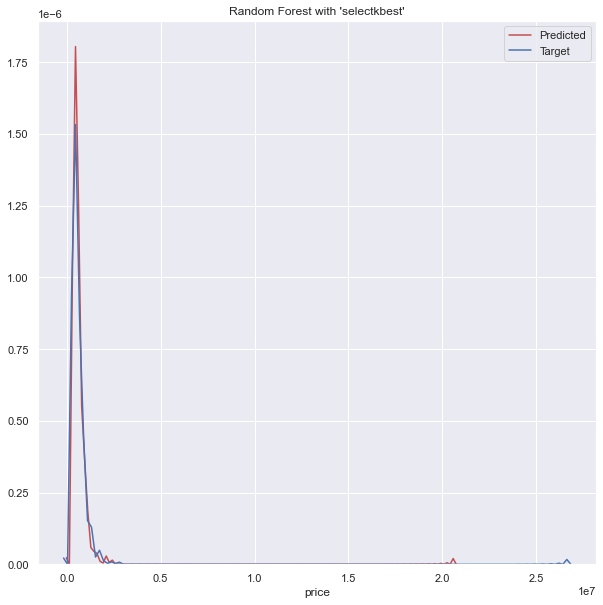

<Figure size 720x720 with 0 Axes>

In [43]:
rs_model.fit(x_test_select,y_test)
y_pred=rs_model.predict(x_test_select)

plt.figure(figsize=(10, 10))
plt.title("Random Forest with 'selectkbest'")
ax3 = sns.distplot(y_pred,color='r',hist=False,label='Predicted')
plt.figure(figsize=(10, 10))
sns.distplot(y_test,hist=False,color='b',ax=ax3,label='Target')
plt.show()

##### Prediction and distribution plot of XGB

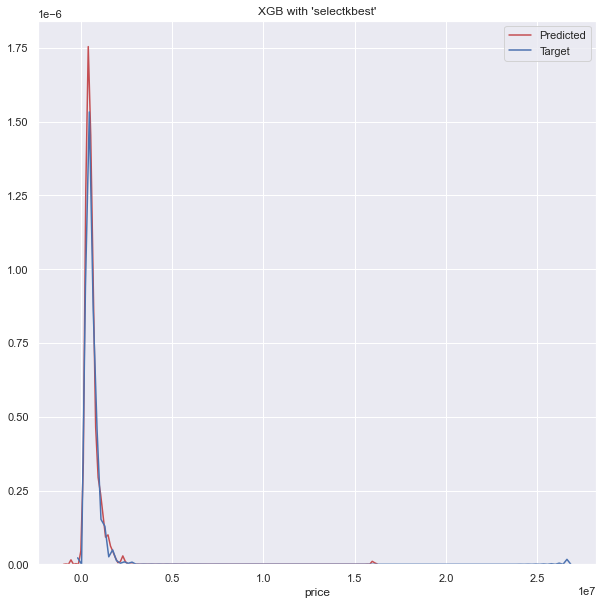

<Figure size 720x720 with 0 Axes>

In [44]:
xgb_model.fit(x_test_select,y_test)
y_pred=xgb_model.predict(x_test_select)

plt.figure(figsize=(10, 10))
plt.title("XGB with 'selectkbest'")
ax3 = sns.distplot(y_pred,color='r',hist=False,label='Predicted')
plt.figure(figsize=(10, 10))
sns.distplot(y_test,hist=False,color='b',ax=ax3,label='Target')
plt.show()